In [1]:
import pandas as pd
import numpy as np
import preprocess
import matplotlib.pyplot as plt

In [2]:
col_names = ['Data Retention', 'Data Security', 'Do Not Track',
       'First Party Collection/Use', 'International and Specific Audiences',
       'Introductory/Generic', 'Policy Change', 'Practice not covered',
       'Privacy contact information', 'Third Party Sharing/Collection',
       'User Access, Edit and Deletion', 'User Choice/Control']

In [3]:
majority_path = r'C:\Users\IsmailKaraman\workspace\data\privacy_policy_data\OPP-115_v2\majority.csv'

In [4]:
df = pd.read_csv(majority_path)

In [5]:
df.head(3)

,text,Data Retention,Data Security,Do Not Track,First Party Collection/Use,International and Specific Audiences,Introductory/Generic,Policy Change,Practice not covered,Privacy contact information,Third Party Sharing/Collection,"User Access, Edit and Deletion",User Choice/Control
0,"""""Contact Us"""" Link If you contact us through...",0,0,0,1,0,0,0,0,0,0,0,0
1,(b) Information automatically collected There...,0,0,0,1,0,0,0,0,0,0,0,0
2,(ii) You have entered a contest or sweepstake...,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
data_dist = df[col_names].sum()
data_dist

Data Retention                            78
Data Security                            207
Do Not Track                              31
First Party Collection/Use              1181
International and Specific Audiences     296
Introductory/Generic                     378
Policy Change                            116
Practice not covered                     129
Privacy contact information              202
Third Party Sharing/Collection           931
User Access, Edit and Deletion           147
User Choice/Control                      352
dtype: int64

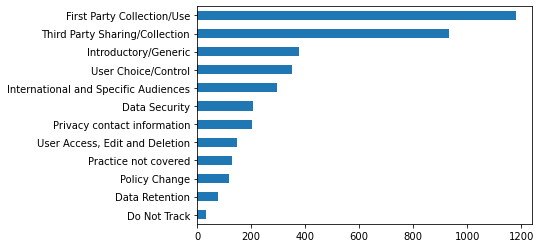

In [7]:
data_dist.sort_values().plot(kind='barh')

In [8]:
df.shape

(3399, 13)

In [9]:
# preprocessing text data
df['text'] = df['text'].apply(preprocess.preprocess_text)

In [10]:
X = df['text']
y = df[col_names]

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X).toarray()

# a base classifier

In [12]:
def print_losses(y_test, preds, clf):
     
    print("\033[1m" + clf + ' results: ' + "\033[0m")
    print('----------------------')
    hamLoss = hamming_loss(y_test.values, preds)
    print('hamLoss: {:.2f}'.format(hamLoss))
    acc_score = accuracy_score(y_test.values, preds)
    print('Exact Match Ratio: {:.2f}'.format(acc_score))
    print('-----------------------------------------------')
    print("\033[1m" + 'Classification Report' + "\033[0m")
    print(classification_report(y_test.values, preds, target_names=list(y_test.columns)))
    print('--------------------------------------------------------------------------------------------')
    print()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Linear SVM
svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svmClassifier.fit(X_train, y_train.values)
svmPreds = svmClassifier.predict(X_test)
print_losses(y_test, svmPreds, 'SVM Classifier')

# Random Forest
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train.values)
rfc_preds = rfc.predict(X_test)
print_losses(y_test, rfc_preds, 'Random Forest Classifier')

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values)
knn_preds = knn.predict(X_test)
print_losses(y_test, knn_preds, 'Random Forest Classifier')

SVM Classifier results: 
----------------------
hamLoss: 0.04
Exact Match Ratio: 0.61
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.67      0.18      0.29        11
                       Data Security       0.93      0.59      0.72        44
                        Do Not Track       1.00      0.75      0.86         8
          First Party Collection/Use       0.83      0.84      0.84       237
International and Specific Audiences       0.95      0.88      0.91        60
                Introductory/Generic       0.78      0.53      0.63        75
                       Policy Change       0.92      0.81      0.86        27
                Practice not covered       0.33      0.04      0.08        23
         Privacy contact information       0.87      0.62      0.73        32
      Third Party Sharing/Collection       0.82      0.67      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier results: 
----------------------
hamLoss: 0.05
Exact Match Ratio: 0.53
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.00      0.00      0.00        11
                       Data Security       1.00      0.45      0.62        44
                        Do Not Track       1.00      0.25      0.40         8
          First Party Collection/Use       0.85      0.74      0.79       237
International and Specific Audiences       1.00      0.68      0.81        60
                Introductory/Generic       1.00      0.37      0.54        75
                       Policy Change       1.00      0.56      0.71        27
                Practice not covered       0.00      0.00      0.00        23
         Privacy contact information       1.00      0.47      0.64        32
      Third Party Sharing/Collection       0.96      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier results: 
----------------------
hamLoss: 0.06
Exact Match Ratio: 0.48
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.67      0.18      0.29        11
                       Data Security       0.95      0.48      0.64        44
                        Do Not Track       1.00      0.75      0.86         8
          First Party Collection/Use       0.73      0.71      0.72       237
International and Specific Audiences       0.94      0.78      0.85        60
                Introductory/Generic       0.67      0.48      0.56        75
                       Policy Change       0.93      0.52      0.67        27
                Practice not covered       1.00      0.04      0.08        23
         Privacy contact information       0.93      0.44      0.60        32
      Third Party Sharing/Collection       0.87      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-means

In [16]:
df_clustering = df.copy()

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=0).fit(X)
df_clustering['kmeans_label'] = kmeans.labels_

In [18]:
df_clustering['kmeans_label'].value_counts()

1     988
6     439
9     381
2     268
7     256
10    235
0     185
8     175
11    158
4     131
5     125
3      58
Name: kmeans_label, dtype: int64

In [19]:
data_dist

Data Retention                            78
Data Security                            207
Do Not Track                              31
First Party Collection/Use              1181
International and Specific Audiences     296
Introductory/Generic                     378
Policy Change                            116
Practice not covered                     129
Privacy contact information              202
Third Party Sharing/Collection           931
User Access, Edit and Deletion           147
User Choice/Control                      352
dtype: int64

In [20]:
for i in range(12):
    print(df_clustering[df_clustering['kmeans_label']==i][col_names].sum())
    print('-'*50)

Data Retention                           4
Data Security                            9
Do Not Track                             0
First Party Collection/Use              84
International and Specific Audiences     3
Introductory/Generic                     7
Policy Change                            1
Practice not covered                     5
Privacy contact information              8
Third Party Sharing/Collection          86
User Access, Edit and Deletion          14
User Choice/Control                     15
dtype: int64
--------------------------------------------------
Data Retention                           46
Data Security                            41
Do Not Track                             17
First Party Collection/Use              444
International and Specific Audiences     55
Introductory/Generic                    106
Policy Change                             6
Practice not covered                     47
Privacy contact information              87
Third Party Sharing/Coll

## LDA topic models

In [21]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=12, random_state=0)
df_clustering['lda_labels'] = lda.fit_transform(X).argmax(axis=1)

In [22]:
df_clustering['lda_labels'].value_counts()

7     1205
5      502
0      414
11     356
6      319
1      276
3      107
9       95
10      58
4       27
2       24
8       16
Name: lda_labels, dtype: int64

In [23]:
for i in range(12):
    print(df_clustering[df_clustering['lda_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                            5
Data Security                           125
Do Not Track                              0
First Party Collection/Use               56
International and Specific Audiences     25
Introductory/Generic                    108
Policy Change                             2
Practice not covered                     34
Privacy contact information              15
Third Party Sharing/Collection           90
User Access, Edit and Deletion            6
User Choice/Control                      11
dtype: int64
--------------------------------------------------
Data Retention                           12
Data Security                            14
Do Not Track                              0
First Party Collection/Use               31
International and Specific Audiences     58
Introductory/Generic                      9
Policy Change                             3
Practice not covered                     10
Privacy contact information               9
Third Party 

## SVD

In [24]:
from sklearn.decomposition import TruncatedSVD

In [25]:
# X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=12, n_iter=7, random_state=42)
df_clustering['svd_labels'] = svd.fit_transform(X).argmax(axis=1)

In [26]:
for i in range(12):
    print(df_clustering[df_clustering['svd_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                           50
Data Security                            60
Do Not Track                             15
First Party Collection/Use              879
International and Specific Audiences     82
Introductory/Generic                    210
Policy Change                            19
Practice not covered                    108
Privacy contact information              63
Third Party Sharing/Collection          707
User Access, Edit and Deletion           80
User Choice/Control                     132
dtype: int64
--------------------------------------------------
Data Retention                            3
Data Security                             6
Do Not Track                              0
First Party Collection/Use                1
International and Specific Audiences     16
Introductory/Generic                    115
Policy Change                            91
Practice not covered                      8
Privacy contact information              64
Third Party 

## hierarchical clustering (AgglomerativeClustering)

In [27]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
df_clustering['agg_labels'] = agg_cluster.fit_predict(X)

In [28]:
for i in range(12):
    print(df_clustering[df_clustering['agg_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                            0
Data Security                             0
Do Not Track                              0
First Party Collection/Use                9
International and Specific Audiences     23
Introductory/Generic                      1
Policy Change                             1
Practice not covered                      6
Privacy contact information               0
Third Party Sharing/Collection          124
User Access, Edit and Deletion            0
User Choice/Control                       0
dtype: int64
--------------------------------------------------
Data Retention                           60
Data Security                            86
Do Not Track                              0
First Party Collection/Use              742
International and Specific Audiences     94
Introductory/Generic                    187
Policy Change                            14
Practice not covered                     67
Privacy contact information              87
Third Party 

# DBScan

In [29]:
from sklearn.cluster import DBSCAN
dbscan_clustering = DBSCAN(eps=1, min_samples=2)
df_clustering['dbs_labels'] = dbscan_clustering.fit_predict(X)

In [30]:
for i in range(12):
    print(df_clustering[df_clustering['dbs_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                            66
Data Security                            172
Do Not Track                              29
First Party Collection/Use              1018
International and Specific Audiences     272
Introductory/Generic                     329
Policy Change                            108
Practice not covered                     108
Privacy contact information              182
Third Party Sharing/Collection           799
User Access, Edit and Deletion           127
User Choice/Control                      308
dtype: int64
--------------------------------------------------
Data Retention                          0
Data Security                           0
Do Not Track                            0
First Party Collection/Use              1
International and Specific Audiences    0
Introductory/Generic                    0
Policy Change                           0
Practice not covered                    0
Privacy contact information             0
Third Party Sharin

# SOM

In [ ]:
from sklearn_som.som import SOM
som_clustering = SOM(m=12, n=10, dim=3686)
df_clustering['som_labels'] = som_clustering.fit_predict(X)

In [ ]:
for i in range(12):
    print(df_clustering[df_clustering['dbs_labels']==i][col_names].sum())
    print('-'*50)

In [ ]:
labels_df = pd.DataFrame()
for label in df.columns.drop('text'):
    
    tmp_df = pd.DataFrame(df[df[label]==1]['text'].copy())
    tmp_df['label'] = label
    labels_df = pd.concat([labels_df, tmp_df])

In [ ]:
labels_df.head()

In [ ]:
X_ = labels_df['text']
vectorizer = TfidfVectorizer()
X_ = vectorizer.fit_transform(X_).toarray()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_ = le.fit_transform(labels_df['label'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(X_)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize=(12, 12))
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_)
plt.legend(handles=plot.legend_elements()[0], labels=list(le.classes_))
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X_)

In [ ]:
# we need 1194 componenets from pca to explain 95% of the variance
import bisect
bisect.bisect(pca.explained_variance_ratio_.cumsum(), 0.95)

In [ ]:
len(Xt[0])